In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
fig = plt.figure() #创建一个绘图对象
ax = fig.add_subplot(121, projection='3d')#111表示1行1列的第一个，即第一幅图
#第二副图 
ax1 = fig.add_subplot(122,projection='3d')
plt.subplots_adjust(wspace=0.5) # 设置子图之间的水平间距
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

number_points = 5
pcd = np.random.rand(number_points, 3)  # uniform distribution over [0, 1)
print(pcd)

# Create Figure:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})#创建一个三维的绘图工程 
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2]) #绘制散点图
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Point Cloud")
# display:
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

mesh = o3d.io.read_triangle_mesh("bunny.ply")
# Visualize:
mesh.compute_vertex_normals() # compute normals for vertices or faces

# Sample 1000 points:
pcd = mesh.sample_points_uniformly(number_of_points=1000)

# visualize:
o3d.visualization.draw_geometries([pcd])
o3d.visualization.draw_geometries([mesh],mesh_show_back_face=True) 

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# read the color and the depth image:
color_raw = o3d.io.read_image("pointcloudprocessing-main/data/rgb.jpg")
depth_raw = o3d.io.read_image("pointcloudprocessing-main/data/depth.png")

# create an rgbd image object:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth( #创建RGBD图像对象
    color_raw, depth_raw, convert_rgb_to_intensity=False) #不将RGB转换为灰度图
# use the rgbd image to create point cloud:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)) #创建点云对象 使用相机内参

# visualize:
o3d.visualization.draw_geometries([pcd])

这段代码首先创建了一个RGBD图像对象，然后使用这个RGBD图像对象创建了一个点云。

解释如下：

- `o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)`：这个函数从原始的彩色图像和深度图像创建一个RGBD图像对象。`convert_rgb_to_intensity=False`表示不将RGB图像转换为灰度图像。

- `o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))`：这个函数从RGBD图像创建一个点云。`o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)`是相机内参，这里使用了PrimeSense相机的默认参数。

注意：`color_raw`和`depth_raw`应该是Open3D的`Image`对象，分别包含原始的彩色图像和深度图像。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
# Create numpy pointcloud:
number_points = 2000
pcd_np = np.random.rand(number_points, 3)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object #创建点云对象
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)  # set pcd_np as the point cloud points
pcd_o3d.colors = o3d.utility.Vector3dVector(np.ones((number_points, 3)) * [1, 0, 0]) # set the color of the point cloud
# Visualize:
# 创建坐标轴
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1, origin=[0, 0, 0]) #x红 y绿 z蓝
o3d.visualization.draw_geometries([pcd_o3d,coordinate_frame])

# Save into ply file:
o3d.io.write_point_cloud("random.pcd", pcd_o3d) #保存点云

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

pcd = o3d.io.read_point_cloud("random.pcd")
# Visualize:
# 创建坐标轴
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1, origin=[0, 0, 0]) #x红 y绿 z蓝
o3d.visualization.draw_geometries([pcd,coordinate_frame])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
# Read the bunny point cloud file:
pcd_o3d = o3d.io.read_point_cloud("bunny.ply")
 
# Convert the open3d object to numpy:
pcd_np = np.asarray(pcd_o3d.points)
 
# Display using matplotlib:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
# display:
plt.show()

In [ ]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d


# Read depth image:
depth_image = iio.imread('pointcloudprocessing-main/data/depth.png')

# print properties:
print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")
#黑色是0
depth_instensity = np.array(255 * (depth_image / 0x0fff), dtype=np.uint8)  #先除以0x0fff(这是深度图像的最大可能值)，再乘以255，最后转换为uint8（0-255）
iio.imwrite('grayscale.png', depth_instensity)

# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image,cmap="gray") #camp:colormap 灰度图显示
axs[0].set_title('Depth image')
#depth_grayscale = iio.imread('grayscale.png')
axs[1].imshow(depth_instensity, cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

`iio.imread`和`o3d.io.read_image`都是用来读取图像文件的函数，但它们来自不同的库，返回的对象类型也不同。

- `iio.imread`来自imageio库。它读取图像文件并返回一个NumPy数组，这个数组的形状通常是(height, width, channels)，其中channels通常是3（对于彩色图像）或1（对于灰度图像）。这个函数可以读取多种格式的图像文件，包括.jpg, .png, .bmp等。

- `o3d.io.read_image`来自Open3D库。它读取图像文件并返回一个Open3D的`Image`对象。这个对象包含图像的数据和一些其他的信息，例如图像的宽度和高度。这个函数主要用于读取和处理3D图像数据，例如深度图像和RGB-D图像。

所以，你应该根据你的具体需求来选择使用哪个函数。如果你只需要处理2D图像数据，`iio.imread`可能是更好的选择。如果你需要处理3D图像数据，或者你需要使用Open3D的其他功能（例如点云处理），那么`o3d.io.read_image`可能是更好的选择。

In [ ]:
#从2D深度图像计算点云
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Read depth image:
depth_image = iio.imread('pointcloudprocessing-main/data/depth.png') #作为numpy数组返回
# Depth camera parameters:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02

# compute point cloud: #从2D深度图像计算点云公式
pcd = []
height, width = depth_image.shape
for i in range(height):
   for j in range(width):
       z = depth_image[i][j]
       x = (j - CX_DEPTH) * z / FX_DEPTH
       y = (i - CY_DEPTH) * z / FY_DEPTH
       pcd.append([x, y, z])

pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
# 创建坐标轴
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=10, origin=[0, 0, 0]) #x红 y绿 z蓝
o3d.visualization.draw_geometries([pcd_o3d,coordinate_frame])

In [ ]:
#彩色点云
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Read the rgb image:
rgb_image = iio.imread('pointcloudprocessing-main/data/rgb.jpg')

# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image, cmap="gray")
axs[0].set_title('Depth image')
axs[1].imshow(rgb_image)
axs[1].set_title('RGB image')
plt.show()

In [ ]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Rotation matrix:
R = -np.array([[9.9997798940829263e-01, 5.0518419386157446e-03, 4.3011152014118693e-03],
                   [-5.0359919480810989e-03, 9.9998051861143999e-01, -3.6879781309514218e-03],
                   [- 4.3196624923060242e-03, 3.6662365748484798e-03, 9.9998394948385538e-01]])
# Translation vector:
T = np.array([2.5031875059141302e-02, -2.9342312935846411e-04, 6.6238747008330102e-04])

# Depth camera parameters:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02
# RGB camera intrinsic Parameters:
FX_RGB = 5.1885790117450188e+02
FY_RGB = 5.1946961112127485e+02
CX_RGB = 3.2558244941119034e+0
CY_RGB = 2.5373616633400465e+02


# Read depth image:
depth_image = iio.imread('pointcloudprocessing-main/data/depth.png') #作为numpy数组返回
rgb_image = iio.imread('pointcloudprocessing-main/data/rgb.jpg')
height, width = depth_image.shape
colors = []
pcd = []
for i in range(height):
    for j in range(width):
        """
            Convert the pixel from depth coordinate system
            to depth sensor 3D coordinate system
        """
        z = depth_image[i][j]
        x = (j - CX_DEPTH) * z / FX_DEPTH
        y = (i - CY_DEPTH) * z / FY_DEPTH

        """
            Convert the point from depth sensor 3D coordinate system
            to rgb camera coordinate system:
        """
        [x_RGB, y_RGB, z_RGB] = np.linalg.inv(R).dot([x, y, z]) - np.linalg.inv(R).dot(T)

        """
            Convert from rgb camera coordinates system
            to rgb image coordinates system:
        """
        #这个点在RGB图像中的坐标
        j_rgb = int((x_RGB * FX_RGB) / z_RGB + CX_RGB + width / 2) #x + width/2从左上角变为中心
        i_rgb = int((y_RGB * FY_RGB) / z_RGB + CY_RGB) #y

        # Add point to point cloud:
        pcd.append([x, y, z])

        # Add the color of the pixel if it exists:
        if 0 <= j_rgb < width and 0 <= i_rgb < height: #
            colors.append(rgb_image[i_rgb][j_rgb] / 255) #/255归一化 #open3d中的颜色是RGB，范围是0-1
        else:
            colors.append([0., 0., 0.])
            
# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create a point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)
pcd_o3d.colors = o3d.utility.Vector3dVector(colors) #open3d中的颜色是RGB，范围是0-1
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

在这段代码中，`j_rgb`和`i_rgb`分别表示点在RGB图像中的x坐标和y坐标。`j_rgb`的计算中加了`width / 2`，而`i_rgb`的计算中没有加`height / 2`，这是因为在这个特定的情况下，相机的光轴（即z轴）已经被调整为通过图像的中心。

具体来说，`CX_RGB`和`CY_RGB`是相机内参，表示相机的主点（即光轴与图像平面的交点）在图像中的位置。在这个例子中，`CX_RGB`和`CY_RGB`已经被设置为图像中心，所以在计算`j_rgb`时需要加`width / 2`，而在计算`i_rgb`时不需要加`height / 2`。

如果`CX_RGB`和`CY_RGB`没有被设置为图像中心，那么在计算`i_rgb`时也需要加`height / 2`。所以，是否需要加`height / 2`取决于相机内参和你的具体需求。

In [ ]:
# 实现地面检测
import numpy as np
import open3d as o3d

# Read point cloud:
pcd = o3d.io.read_point_cloud("road.pcd")
# Create a 3D coordinate system:
origin = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)
# geometries to draw:
geometries = [pcd, origin]
# Visualize:
o3d.visualization.draw_geometries(geometries)

# Get max and min points of each axis x, y and z:
x_max = max(pcd.points, key=lambda x: x[0]) #lambda x: x[0]表示以x[0]为关键字进行排序 #红色
y_max = max(pcd.points, key=lambda x: x[1]) #绿色
z_max = max(pcd.points, key=lambda x: x[2]) #蓝色
x_min = min(pcd.points, key=lambda x: x[0]) #黄色
y_min = min(pcd.points, key=lambda x: x[1]) #紫红 
z_min = min(pcd.points, key=lambda x: x[2]) #青色

# Colors:
RED = [1., 0., 0.]
GREEN = [0., 1., 0.]
BLUE = [0., 0., 1.]
YELLOW = [1., 1., 0.]
MAGENTA = [1., 0., 1.] #紫红
CYAN = [0., 1., 1.]  #青色
 
positions = [x_max, y_max, z_max, x_min, y_min, z_min]
colors = [RED, GREEN, BLUE, MAGENTA, YELLOW, CYAN]
for i in range(len(positions)):
   # Create a sphere mesh:
   sphere = o3d.geometry.TriangleMesh.create_sphere(radius=1)
   # move to the point position:
   sphere.translate(np.asarray(positions[i]))
   # add color:
   sphere.paint_uniform_color(np.asarray(colors[i]))
   # compute normals for vertices or faces:
   sphere.compute_vertex_normals()
   # add to geometry list to display later:
   geometries.append(sphere)
 
# Display:
o3d.visualization.draw_geometries(geometries)
## Define a threshold:
THRESHOLD = 0.7
 
# Get the max value along the y-axis:
z_min = min(pcd.points, key=lambda x: x[2])[2] #青色 #[x,y,z]
 
# Get the original points color to be updated:
pcd_colors = np.asarray(pcd.colors)
 
# Number of points:
n_points = pcd_colors.shape[0]
 
# update color:
for i in range(n_points):
    # if the current point is aground point:
    if pcd.points[i][2] <= z_min  + THRESHOLD: ######
        pcd_colors[i] = CYAN   # color it CYAN 
 
pcd.colors = o3d.utility.Vector3dVector(pcd_colors)
 
# Display:
o3d.visualization.draw_geometries([pcd, origin])


In [ ]:
#直通滤波器 #对输入数据应用约束，这些约束通常是阈值或间隔。
#对于点云，如果一个点满足约束，则点通过过滤器，这些约束主要是沿一个或多个轴的间隔。

import numpy as np
import open3d as o3d
import math
import itertools
 
if __name__ == '__main__':
    # Read point cloud:
    pcd = o3d.io.read_point_cloud("road.pcd")
 
    # Create bounding box:
    bounds = [[-math.inf, math.inf], [-math.inf, math.inf], [0,0.5]]  # set the bounds #对x,y不做限制，对z限制在0.8-2之间
    bounding_box_points = list(itertools.product(*bounds))  # create limit points
    bounding_box = o3d.geometry.AxisAlignedBoundingBox.create_from_points(
        o3d.utility.Vector3dVector(bounding_box_points))  # create bounding box object  #创建一个包围盒 8个顶点
 
    # Crop the point cloud using the bounding box:
    pcd_croped = pcd.crop(bounding_box)
 
    # Display the cropped point cloud:
    o3d.visualization.draw_geometries([pcd_croped])

In [ ]:
import itertools
for i in itertools.product([1, 2, 3], [4, 5, 6]):
    print(i)
bounds = [[-math.inf, math.inf], [-math.inf, math.inf], [0,0.5]] 
print(bounds)
print(*bounds)
print(itertools.product(*bounds))
print(list(itertools.product(*bounds)))

In [ ]:
import open3d as o3d
import numpy as np

# 生成一个随机点云
pcd = o3d.geometry.PointCloud()
points = np.random.rand(100, 3)
pcd.points = o3d.utility.Vector3dVector(points)

# 使用这个方法创建一个包围盒
bbox = o3d.geometry.AxisAlignedBoundingBox.create_from_points(points)

# 可视化结果
o3d.visualization.draw_geometries([pcd, bbox])


In [ ]:
# 下采样
import open3d as o3d
import numpy as np
 
if __name__ == '__main__':
    # Read point cloud:
    pcd = o3d.io.read_point_cloud("bunny.pcd")
 
    # Random down-sampling:
    random_pcd = pcd.random_down_sample(sampling_ratio=0.005) #随机下采样 #sampling_ratio:采样比例
 
    # Uniform down-sampling:
    uniform_pcd = pcd.uniform_down_sample(every_k_points=200) #均匀下采样 #every_k_points:每k个点采样一个
 
    # Voxel down-sampling:
    voxel_pcd = pcd.voxel_down_sample(voxel_size=0.05) #体素下采样 #voxel_size:体素大小
 
    # Translating point clouds:
    points = np.asarray(random_pcd.points)
    points += [-1, 1, 0] #平移
    random_pcd.points = o3d.utility.Vector3dVector(points)
 
    points = np.asarray(uniform_pcd.points)
    points += [0, 1, 0] #
    uniform_pcd.points = o3d.utility.Vector3dVector(points)
 
    points = np.asarray(voxel_pcd.points)
    points += [1, 1, 0]
    voxel_pcd.points = o3d.utility.Vector3dVector(points)
 
    # Display:
    o3d.visualization.draw_geometries([pcd, random_pcd, uniform_pcd, voxel_pcd])

In [ ]:
#异常值去除过滤器
import open3d as o3d
import numpy as np
 

# Read point cloud:
pcd = o3d.io.read_point_cloud("bunny.pcd")
pcd.paint_uniform_color([0., 0., 0.])
# Down sampling to reduce the running time:
pcd = pcd.voxel_down_sample(voxel_size=0.02)#体素下采样

# Radius outlier removal:  #移除给定半径的球体内相邻点数少于给定数量的每个点 #返回：过滤点云的元组和内变量索引的列表。
pcd_rad, ind_rad = pcd.remove_radius_outlier(nb_points=16, radius=0.05) #半径异常值去除 #nb_points:邻近点的数量 radius:半径
outlier_rad_pcd = pcd.select_by_index(ind_rad, invert=True) #反转选择异常点
outlier_rad_pcd.paint_uniform_color([1., 0., 1.]) #设置异常点的颜色

# Statistical outlier removal:#移除距离其相邻点较远的点
pcd_stat, ind_stat = pcd.remove_statistical_outlier(nb_neighbors=20, #统计异常值去除 #nb_neighbors:邻近点的数量 std_ratio:标准偏差比
                                                std_ratio=2.0)
outlier_stat_pcd = pcd.select_by_index(ind_stat, invert=True)
outlier_stat_pcd.paint_uniform_color([0., 0., 1.]) #蓝

# Translate to visualize:
points = np.asarray(pcd_stat.points) #统计异常过滤器的正常点
points += [1, 0, 0]
pcd_stat.points = o3d.utility.Vector3dVector(points) #numpy数组转换为open3d向量

points = np.asarray(outlier_stat_pcd.points) #统计异常过滤器的异常点
points += [1, 0, 0]
outlier_stat_pcd.points = o3d.utility.Vector3dVector(points)

# Display:
# 创建坐标轴
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1, origin=[0, 0, 0]) #x红 y绿 z蓝
o3d.visualization.draw_geometries([pcd_stat, pcd_rad, outlier_stat_pcd, outlier_rad_pcd,coordinate_frame])

In [ ]:
# 点云分割
import numpy as np
import open3d as o3d
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
 
# Read point cloud:
pcd = o3d.io.read_point_cloud(r"D:\study\pointcloud\pointcloudprocessing-main\data\depth_2_pcd_downsampled.ply")
#pcd.paint_uniform_color([0., 0., 0.])
# Get points and transform it to a numpy array:
points = np.asarray(pcd.points).copy()
# Down sampling to reduce the running time:
#pcd = pcd.voxel_down_sample(voxel_size=0.01)#体素下采样

# Normalisation:
scaled_points = StandardScaler().fit_transform(points) #标准化

# Clustering:
#method = DBSCAN(eps=0.15, min_samples=10) #eps:半径 min_samples:最小样本数  #DBSCAN聚类
model = KMeans(n_clusters=4)  #KMeans聚类
model.fit(scaled_points) #训练
# Get labels:
labels = model.labels_
# Get the number of colors:
n_clusters = len(set(labels)) 
 
# Mapping the labels classes to a color map:
colors = plt.get_cmap("tab20")(labels / (n_clusters if n_clusters > 0 else 1))
# Attribute to noise the black color:
colors[labels < 0] = 0
# Update points colors:
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
 
# Display:
o3d.visualization.draw_geometries([pcd])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 原始数据
points = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# 标准化  #标准化后的数据符合标准正态分布，即均值为0，标准差为1
scaled_points = StandardScaler().fit_transform(points)

print(scaled_points)

In [ ]:
#投影点云 #不关心高度，将高度投影到地面上 #DBSCAN聚类基础上
import numpy as np
import open3d as o3d
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pcd = o3d.io.read_point_cloud(r"D:\study\pointcloud\pointcloudprocessing-main\data\depth_2_pcd_downsampled.ply")
points = np.asarray(pcd.points).copy()  #copy()函数是深拷贝，即在堆内存中重新分配空间，然后将原变量的值复制过去，改变原变量的值不会影响新变量的值
# Project points on OXZ plane:
points[:, 1] = 0
pcd_projected = o3d.geometry.PointCloud()  # create point cloud object
pcd_projected.points = o3d.utility.Vector3dVector(points)  # set pcd_np as the point cloud points
o3d.visualization.draw_geometries([pcd_projected])

# projection: caonsider the x and z coordinates (y=0)
points_xz = points[:, [0, 2]]
 
# Normalisation:
scaled_points = StandardScaler().fit_transform(points_xz)
 
# Clustering:
model = DBSCAN(eps=0.15, min_samples=10)
model.fit(scaled_points)
# Get labels:
labels = model.labels_
# Get the number of colors:
n_clusters = len(set(labels)) 
 
# Mapping the labels classes to a color map:
colors = plt.get_cmap("tab20")(labels / (n_clusters if n_clusters > 0 else 1))
# Attribute to noise the black color:
colors[labels < 0] = 0
# Update points colors:
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
pcd_projected.colors = o3d.utility.Vector3dVector(colors[:, :3])
# Display:
#平移
points = np.asarray(pcd.points)
points += [3, 0, 0]
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_geometries([pcd,pcd_projected])
#o3d.visualization.draw_geometries([pcd_projected])



`points = np.asarray(pcd.points)` 和 `points = np.asarray(pcd.points).copy()` 这两行代码的主要区别在于是否创建了原始数据的副本。

`np.asarray(pcd.points)` 会尝试将 `pcd.points` 转换为 NumPy 数组。如果 `pcd.points` 已经是 NumPy 数组，那么 `np.asarray` 不会创建新的数组，而是返回原始数组的视图。这意味着，如果你修改 `points`，那么 `pcd.points` 也会被修改。

`np.asarray(pcd.points).copy()` 会创建 `pcd.points` 的一个深拷贝。这意味着，即使你修改 `points`，`pcd.points` 也不会被修改。

如果你不希望修改 `points` 时影响到 `pcd.points`，那么你应该使用 `np.asarray(pcd.points).copy()`。如果你不介意 `points` 和 `pcd.points` 共享数据，那么你可以使用 `np.asarray(pcd.points)`，这样可以节省内存。

In [ ]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义二次曲面函数
def quad_surface(x, y, a, b, c, d, e, f):
    return a*x**2 + b*y**2 + c*x*y + d*x + e*y + f

# 生成随机数据
np.random.seed(0) # 设置随机种子
n = 100 # 数据点个数
x = np.linspace(-5, 5, n) # x坐标
y = np.linspace(-5, 5, n) # y坐标
X, Y = np.meshgrid(x, y) # 生成网格
Z = quad_surface(X, Y, 1, 2, 0.5, -1, -2, 10) # 真实的二次曲面
noise = np.random.normal(0, 5, size=Z.shape) # 添加噪声
Z_noise = Z + noise # 带噪声的二次曲面

# 将数据转换为一维数组
x_data = X.flatten()
y_data = Y.flatten()
z_data = Z_noise.flatten()

# 构造系数矩阵A和目标向量b
A = np.c_[x_data**2, y_data**2, x_data*y_data, x_data, y_data, np.ones(n**2)]
b = z_data

# 使用最小二乘法求解参数向量
p, res, rnk, s = np.linalg.lstsq(A, b, rcond=None)
a, b, c, d, e, f = p # 拟合得到的参数
print(f"拟合得到的参数为：a={a:.2f}, b={b:.2f}, c={c:.2f}, d={d:.2f}, e={e:.2f}, f={f:.2f}")

# 计算拟合后的二次曲面
Z_fit = quad_surface(X, Y, a, b, c, d, e, f)

# 绘制三维图像
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # 绘制真实的二次曲面
ax1.set_title("True quadratic surface")
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_data, y_data, z_data, c='r', s=10) # 绘制带噪声的数据点
ax2.plot_surface(X, Y, Z_fit, cmap='viridis', alpha=0.8) # 绘制拟合后的二次曲面
ax2.set_title("Fitted quadratic surface with noise")
plt.show()


In [6]:
# 导入 Open3D 库和其他必要的模块
import open3d as o3d
import numpy as np
from scipy.optimize import least_squares

# 定义一个函数来进行二次曲面的最小二乘法拟合
def fit_quadratic_surface(points, params):
    # 将点云数据转换为 numpy 数组
    points = np.asarray(points)
    # 提取 x, y, z 坐标
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    # 定义二次曲面的方程
    def f(params, x, y):
        a, b, c, d, e, f = params
        return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f
    # 定义残差函数
    def residual(params, x, y, z):
        return z - f(params, x, y)
    # 使用最小二乘法求解参数
    result = least_squares(residual, params, args=(x, y, z))
    # 返回拟合后的参数
    return result.x

# 读取点云数据
pcd = o3d.io.read_point_cloud("bunny.pcd")
# 定义初始参数
params = [1, 1, 1, 1, 1, 1]
# 调用拟合函数
params = fit_quadratic_surface(pcd.points, params)
# 打印拟合结果
print("拟合后的参数为：", params)

# 可视化点云和拟合的曲面
# 创建一个网格对象


# 从点云创建网格
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha=0.01)

# 计算网格的法向量
mesh.compute_vertex_normals()
# 设置网格的颜色
mesh.paint_uniform_color([0.8, 0.8, 0.8])
# 创建一个可视化窗口
vis = o3d.visualization.Visualizer()
vis.create_window()
# 添加点云和网格到窗口
vis.add_geometry(pcd)
vis.add_geometry(mesh)
# 更新网格的顶点坐标
def update_mesh(params):
    # 根据参数计算新的 z 坐标
    a, b, c, d, e, f = params
    x = np.asarray(mesh.vertices)[:, 0]
    y = np.asarray(mesh.vertices)[:, 1]
    z = a * x**2 + b * y**2 + c * x * y + d * x + e * y + f
    # 更新网格的顶点
    mesh.vertices = o3d.utility.Vector3dVector(np.c_[x, y, z])
    # 更新网格的法向量
    mesh.compute_vertex_normals()
    # 更新可视化窗口
    vis.update_geometry(mesh)
    vis.poll_events()
    vis.update_renderer()

# 调用更新函数
update_mesh(params)
# 进入主循环
vis.run()
# 销毁窗口
vis.destroy_window()


拟合后的参数为： [ 1.15305288 -4.04892606  0.44668727 -0.0409386   0.6532757  -0.01202592]


In [1]:
# 导入 numpy 库
import numpy as np

# 定义一个矩阵 H
H = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 使用 np.linalg.svd(H) 函数对 H 进行奇异值分解
U, S, V = np.linalg.svd(H)

# 打印分解后的矩阵 U, S, V
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)


U = 
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
S = 
 [1.68481034e+01 1.06836951e+00 3.33475287e-16]
V = 
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


In [7]:
points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
idx = np.array([0, 2])
print(points[idx])
# 输出：[[1, 2, 3], [7, 8, 9]]

#
average_data = np.mean(points, axis=0) #axis=0表示按列求均值
print(average_data)
decentration_matrix = points - average_data
print(decentration_matrix)

[[1 2 3]
 [7 8 9]]
[5.5 6.5 7.5]
[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]


In [19]:
import numpy as np
li =[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
try :
    print(li[:,0])
except Exception as error:
    print(error)#报错
shuzu =np.array(li)[:,0] #第一个：表示第一维，第二个0表示第二维的第一个元素 #或者说取第一列
print(shuzu)
print(type(shuzu))
print(list(shuzu))

list indices must be integers or slices, not tuple
[ 1  4  7 10]
<class 'numpy.ndarray'>
[1, 4, 7, 10]


In [24]:
import numpy as np
points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
average_data = np.mean(points, axis=0) #axis=0表示按列求均值
print(average_data)
#[5.5 6.5 7.5]

[5.5 6.5 7.5]


In [28]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
variance = np.var(a,axis=1) #axis=1表示按行求方差
print(variance)
#[0.66666667 0.66666667 0.66666667 0.66666667]

[0.66666667 0.66666667 0.66666667 0.66666667]


In [29]:
import numpy as np
a = ([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
sample_variance = np.var(a, ddof=1, axis=1) #ddof=1表示无偏估计
print(sample_variance)
#[1. 1. 1. 1.]

[1. 1. 1. 1.]


In [38]:
import numpy as np #第二种
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
sample_standard_deviation = np.std(a, ddof=0,axis=1) #ddof=0表示有偏估计
print(sample_standard_deviation)
#[0.81649658 0.81649658 0.81649658 0.81649658]

[0.81649658 0.81649658 0.81649658 0.81649658]


In [65]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])
covariance = np.cov(x, y,ddof=1)# np.cov(x, y)返回一个协方差矩阵
print(covariance)
'''
[[ 2.5 -2.5]
 [-2.5  2.5]]
'''

[[ 2.5 -2.5]
 [-2.5  2.5]]


'\n[[ 2.5 -2.5]\n [-2.5  2.5]]\n'

In [177]:
import numpy as np #第二种
x = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
covariance = np.cov(x,ddof=1)
print(covariance)
'''
[[ 1.         -1.          3.5         5.5       ]
 [-1.          1.33333333 -4.33333333 -7.        ]
 [ 3.5        -4.33333333 14.33333333 23.        ]
 [ 5.5        -7.         23.         37.        ]]
'''

[[ 1.         -1.          3.5         5.5       ]
 [-1.          1.33333333 -4.33333333 -7.        ]
 [ 3.5        -4.33333333 14.33333333 23.        ]
 [ 5.5        -7.         23.         37.        ]]


In [72]:
#验证协方差公式
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 1, 3, 2, 1])
print(np.cov(x, y,ddof=0)[0][0]) #ddof=0表示有偏估计
print(np.cov(x, y,ddof=0)[1][1])
print(np.cov(x, y,ddof=0)[0][1])
covx = np.mean((x - x.mean()) ** 2) #np.mean()求均值 /n
covy = np.mean((y - y.mean()) ** 2)
covxy = np.mean((x - x.mean()) * (y - y.mean()))
print(covx)
print(covy)
print(covxy)
'''
2.0
2.0
-2.0
2.0
2.0
-2.0
'''

2.0
2.2399999999999998
-1.4000000000000001
2.0
2.2399999999999998
-1.4


'\n2.0\n2.0\n-2.0\n2.0\n2.0\n-2.0\n'

In [59]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
mean = np.mean(a)
average = np.average(a, weights=weights)
try :
    print(a, weights=weights)
except Exception as error:
    print(error)
print("mean:", mean)
print("average:", average)
'''
'weights' is an invalid keyword argument for print()
mean: 3.0
average: 3.6666666666666665
'''



'weights' is an invalid keyword argument for print()
mean: 3.0
average: 3.6666666666666665


In [60]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
weights = np.array([0.1, 0.2, 0.3, 0.2, 0.2])
weighted_expectation = np.average(a, weights=weights)
print(weighted_expectation)
#3.2

3.2


In [85]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
covxx = np.cov(x,ddof=1)
varx = np.var(x,ddof=1)
print(covx)
print(varx)
'''
2.5
2.5
'''

2.5
2.5


'\n2.5\n2.5\n'

In [88]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
covariance_matrix = np.cov(x,x,ddof=1)
print(covariance_matrix)


[[2.5 2.5]
 [2.5 2.5]]


In [101]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
average = np.mean(x, axis=0)
decentration_matrix = x - average
print(decentration_matrix)

H = np.dot(decentration_matrix.T,decentration_matrix)
print(H)
covariance_matrix = np.cov(x,ddof=1)
print(covariance_matrix)

[[-4.5 -4.5 -4.5]
 [-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]
 [ 4.5  4.5  4.5]]
[[45. 45. 45.]
 [45. 45. 45.]
 [45. 45. 45.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [180]:
import numpy as np

# 定义一个3x2的矩阵A
A = np.array([[0, 1], [1, 1], [1, 0]])
print(A)

# 求AAT的特征值和特征向量
AAT = np.dot(A, A.T)
print(AAT)
eig_val, eig_vec = np.linalg.eig(AAT) #默认返回单位向量
print(eig_val)
print(eig_vec)

# 按特征值的大小降序排列，调整特征向量的顺序
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]

U=eig_vec
print(U)

# 求ATA的特征值和特征向量
ATA = np.dot(A.T, A)
print(ATA)
eig_val, eig_vec = np.linalg.eig(ATA)
print(eig_val)
print(eig_vec)

# 按特征值的大小降序排列，调整特征向量的顺序
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]

V=eig_vec
print(V)

# 求奇异值，构成Σ
Sigma = np.diag(np.sqrt(eig_val))
print(Sigma) #默认shape是与行列的较小值的方阵

#理应shape与输入矩阵A相同
Sigma = np.append(Sigma, np.zeros((1, A.shape[1])), axis=0)
print(Sigma)

# 验证A=UΣV*
print(np.dot(U, np.dot(Sigma, V.T))) #特征向量不唯一导致的

'''
[[0 1]
 [1 1]
 [1 0]]
[[1 1 0]
 [1 2 1]
 [0 1 1]]
[ 3.00000000e+00  1.00000000e+00 -5.13860489e-17]
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
[[2 1]
 [1 2]]
[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[1.73205081 0.        ]
 [0.         1.        ]]
[[1.73205081 0.        ]
 [0.         1.        ]
 [0.         0.        ]]
[[-1.00000000e+00  2.22044605e-16]
 [-1.00000000e+00 -1.00000000e+00]
 [-1.11022302e-16 -1.00000000e+00]]
'''

[[0 1]
 [1 1]
 [1 0]]
[[1 1 0]
 [1 2 1]
 [0 1 1]]
[ 3.00000000e+00  1.00000000e+00 -5.13860489e-17]
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
[[2 1]
 [1 2]]
[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[1.73205081 0.        ]
 [0.         1.        ]]
[[1.73205081 0.        ]
 [0.         1.        ]
 [0.         0.        ]]
[[-1.00000000e+00  2.22044605e-16]
 [-1.00000000e+00 -1.00000000e+00]
 [-1.11022302e-16 -1.00000000e+00]]


'\n[[0 1]\n [1 1]\n [1 0]]\n[[1 1 0]\n [1 2 1]\n [0 1 1]]\n[ 3.00000000e+00  1.00000000e+00 -5.13860489e-17]\n[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]\n [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]\n [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]\n[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]\n [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]\n [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]\n[[2 1]\n [1 2]]\n[3. 1.]\n[[ 0.70710678 -0.70710678]\n [ 0.70710678  0.70710678]]\n[[ 0.70710678 -0.70710678]\n [ 0.70710678  0.70710678]]\n[[1.73205081 0.        ]\n [0.         1.        ]]\n[[1.73205081 0.        ]\n [0.         1.        ]\n [0.         0.        ]]\n[[-1.00000000e+00  2.22044605e-16]\n [-1.00000000e+00 -1.00000000e+00]\n [-1.11022302e-16 -1.00000000e+00]]\n'

In [167]:
import numpy as np

# 定义一个3x2的矩阵A
A = np.array([[0, 1], [1, 1], [1, 0]])
print(A)

# 使用linalg.svd函数进行奇异值分解
U, S, V = np.linalg.svd(A)

# 打印结果
print("U:", U)
print("S:", S)
print("V:", V)

# 使用diag函数构造对角矩阵Σ
Sigma = np.diag(S)
print("Sigma:", Sigma)




[[0 1]
 [1 1]
 [1 0]]
U: [[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  5.55111512e-17 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
S: [1.73205081 1.        ]
V: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Sigma: [[1.73205081 0.        ]
 [0.         1.        ]]


In [103]:
import numpy as np

# 定义一个3x2的矩阵A
A = np.array([[0, 1], [1, 1], [1, 0]])
print(A.shape)

(3, 2)


In [162]:
import numpy as np

# 定义一个3x2的矩阵A
A = np.array([[0, 1], [1, 1], [1, 0]])
print(A)

# 求AAT的特征值和特征向量
AAT = np.dot(A, A.T)
print(AAT)
eig_val, eig_vec = np.linalg.eig(AAT)
print(eig_val)
print(eig_vec)

# 按特征值的大小降序排列，调整特征向量的顺序
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]

li =[]
# 遍历每个特征向量
for i in range(len(eig_val)):
    # 取出第i个特征向量
    eig_vector = eig_vec[:, i]
    print(eig_vector)
    # 求出特征向量的长度
    length = np.linalg.norm(eig_vector)
    print (length)
    # 用特征向量除以它的长度，得到单位化的特征向量
    unit_eig_vector = eig_vector / length
    li.append(unit_eig_vector)
unit_eig_vector=np.asarray(li) #行放到列上了
print(unit_eig_vector.T) #转置


[[0 1]
 [1 1]
 [1 0]]
[[1 1 0]
 [1 2 1]
 [0 1 1]]
[ 3.00000000e+00  1.00000000e+00 -5.13860489e-17]
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
[-0.40824829 -0.81649658 -0.40824829]
1.0
[ 7.07106781e-01  2.48915666e-16 -7.07106781e-01]
0.9999999999999999
[ 0.57735027 -0.57735027  0.57735027]
1.0
[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  2.48915666e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]


In [169]:
import numpy as np

# 定义一个3x2的矩阵A
A = np.array([[0, 1], [1, 1], [1, 0]])
print(A)

# 使用linalg.svd函数进行奇异值分解
U, S, V = np.linalg.svd(A)

# 打印结果
print("U:", U)
print("S:", S)
print("V:", V)

# 使用diag函数构造对角矩阵Σ
Sigma = np.diag(S)
print("Sigma:", Sigma)


'''
[[0 1]
 [1 1]
 [1 0]]
U: [[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  5.55111512e-17 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
S: [1.73205081 1.        ]
V: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Sigma: [[1.73205081 0.        ]
 [0.         1.        ]]
'''

[[0 1]
 [1 1]
 [1 0]]
U: [[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  5.55111512e-17 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]
S: [1.73205081 1.        ]
V: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Sigma: [[1.73205081 0.        ]
 [0.         1.        ]]


In [181]:
li = [1,2,3,4,5]
li[::-1] #倒序

[5, 4, 3, 2, 1]

In [196]:
import numpy as np
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
#1、去中心化
average = np.mean(A, axis=0)
decentration_matrix = A - average #去中心化
std=np.std(A, axis=0,ddof=1)
#decentration_matrix = decentration_matrix/std #标准化        
print(decentration_matrix)
#2、求协方差矩阵
H = np.dot(decentration_matrix.T, decentration_matrix)  # 求协方差矩阵
print(H)
#3、求协方差矩阵的特征值和特征向量
eigenvectors, eigenvalues, eigenvectors_T = np.linalg.svd(H) 
print(eigenvalues)
#4、降序排列特征值，调整特征向量的顺序
index = eigenvalues.argsort()[::-1] # 从大到小排序 .argsort()是升序排序，[::-1]是将数组反转，实现降序排序
eigenvalues = eigenvalues[index] # 特征值  ## 使用索引来获取排序后的数组
print(eigenvalues)
eigenvectors = eigenvectors[:, index] # 特征向量
print(eigenvectors)
#5、贡献率
contribution_rate = eigenvalues / eigenvalues.sum()
print(contribution_rate)
'''
[[-0.75 -3.5  -3.25]
 [ 1.25 -4.5  -5.25]
 [ 0.25  2.5   2.75]
 [-0.75  5.5   5.75]]
[[ 2.75 -6.5  -7.75]
 [-6.5  69.   73.5 ]
 [-7.75 73.5  78.75]]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[[-0.06925606 -0.96162402  0.26548605]
 [ 0.68147921 -0.23995698 -0.69138031]
 [ 0.72855315  0.13304095  0.67194525]]
[9.84967868e-01 1.46196002e-02 4.12532311e-04]
'''

[[-0.75 -3.5  -3.25]
 [ 1.25 -4.5  -5.25]
 [ 0.25  2.5   2.75]
 [-0.75  5.5   5.75]]
[[ 2.75 -6.5  -7.75]
 [-6.5  69.   73.5 ]
 [-7.75 73.5  78.75]]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[[-0.06925606 -0.96162402  0.26548605]
 [ 0.68147921 -0.23995698 -0.69138031]
 [ 0.72855315  0.13304095  0.67194525]]
[9.84967868e-01 1.46196002e-02 4.12532311e-04]


In [2]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


def surface_curvature(X, Y, Z):

	(lr, lb) = X.shape

	print(lr)
	print(lb)
# 一阶导数
	Xv, Xu = np.gradient(X)
	Yv, Yu = np.gradient(Y)
	Zv, Zu = np.gradient(Z)
# print(Xu)

# 二阶导数
	Xuv, Xuu = np.gradient(Xu)
	Yuv, Yuu = np.gradient(Yu)
	Zuv, Zuu = np.gradient(Zu)

	Xvv, Xuv = np.gradient(Xv)
	Yvv, Yuv = np.gradient(Yv)
	Zvv, Zuv = np.gradient(Zv)

# 2D 到 1D 转换
# 重构为一维向量
	Xu = np.reshape(Xu, lr*lb)
	Yu = np.reshape(Yu, lr*lb)
	Zu = np.reshape(Zu, lr*lb)
	Xv = np.reshape(Xv, lr*lb)
	Yv = np.reshape(Yv, lr*lb)
	Zv = np.reshape(Zv, lr*lb)
	Xuu = np.reshape(Xuu, lr*lb)
	Yuu = np.reshape(Yuu, lr*lb)
	Zuu = np.reshape(Zuu, lr*lb)
	Xuv = np.reshape(Xuv, lr*lb)
	Yuv = np.reshape(Yuv, lr*lb)
	Zuv = np.reshape(Zuv, lr*lb)
	Xvv = np.reshape(Xvv, lr*lb)
	Yvv = np.reshape(Yvv, lr*lb)
	Zvv = np.reshape(Zvv, lr*lb)

	Xu = np.c_[Xu, Yu, Zu]
	Xv = np.c_[Xv, Yv, Zv]
	Xuu = np.c_[Xuu, Yuu, Zuu]
	Xuv = np.c_[Xuv, Yuv, Zuv]
	Xvv = np.c_[Xvv, Yvv, Zvv]

# 曲面的第一基本系数(E,F,G)
	
	E = np.einsum('ij,ij->i', Xu, Xu)
	F = np.einsum('ij,ij->i', Xu, Xv)
	G = np.einsum('ij,ij->i', Xv, Xv)

	m = np.cross(Xu, Xv, axisa=1, axisb=1)
	p = np.sqrt(np.einsum('ij,ij->i', m, m))
	n = m/np.c_[p, p, p]
# n 为法向量
# 曲面的第二基本系数(L,M,N)， (e,f,g)
	L = np.einsum('ij,ij->i', Xuu, n)  # e
	M = np.einsum('ij,ij->i', Xuv, n)  # f
	N = np.einsum('ij,ij->i', Xvv, n)  # g

# 高斯曲率
	K = (L*N-M**2)/(E*G-F**2)
	K = np.reshape(K, lr*lb)
# print(K.size)

# 平均曲率
	H = ((E*N + G*L - 2*F*M)/((E*G - F**2)))/2
	print(H.shape)
	H = np.reshape(H,lr*lb)
# print(H.size)

# 主曲率
	Pmax = H + np.sqrt(H**2 - K)
	Pmin = H - np.sqrt(H**2 - K)
# [Pmax, Pmin]最大主曲率和最小主曲率
	Principle = [Pmax, Pmin]
	return Principle


x = np.linspace(-1, 1, 20) #在指定的间隔内返回均匀间隔的数字
y = np.linspace(-1, 1, 20)
[x, y] = np.meshgrid(x, y) #

z = (x**3 +y**2 +x*y)

temp1 = surface_curvature(x, y, z)
print("maximum curvatures")
print(temp1[0])
print("minimum curvatures")
print(temp1[1])
fig = pylab.figure()
ax = Axes3D(fig)

ax.plot_surface(x, y, z)
pylab.show()



20
20
(400,)
maximum curvatures
[0.07217013 0.05890548 0.05650017 0.06197742 0.06726835 0.07256327
 0.07838595 0.08559833 0.0956398  0.11166884 0.14419046 0.23998071
 0.4827739  0.88363455 1.4652928  2.18078011 2.70569323 2.58416042
 1.58400258 1.09102953 0.11940311 0.09582154 0.09052881 0.09853311
 0.10642268 0.11434435 0.12292906 0.13320621 0.14666595 0.16599514
 0.19929568 0.29180179 0.55949527 1.00574327 1.63924292 2.3687976
 2.79751802 2.53857027 1.57966339 1.15298087 0.20543698 0.16268966
 0.14987632 0.16244953 0.17546017 0.18888558 0.20359292 0.2211481
 0.2436269  0.27391968 0.31811645 0.4061094  0.6847199  1.20719429
 1.946192   2.71384136 2.975353   2.49242903 1.57049282 1.21403238
 0.26534181 0.21137812 0.19279954 0.21069133 0.2297148  0.24945991
 0.27086499 0.29612149 0.32838823 0.3722209  0.43699319 0.55850515
 0.87579323 1.48749856 2.32418458 3.0169864  2.95358864 2.23690448
 1.38590931 1.09071022 0.33639883 0.27544375 0.25095593 0.27693173
 0.30540158 0.33527018 0.3673203

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np
#假设一个点的邻近点集合为：A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
def pca_compute(data, sort=True):
    """
    点云的特征值与特征向量
    :param data: 点云数据 numpy数组形式为[[x1,y1,z1],[x2,y2,z2],...]
    :return: 特征值
    """
    average_data = np.mean(data, axis=0) # 求每一列的平均值，即求各个特征的平均值
    decentration_matrix = data - average_data  # 去中心化矩阵
 
    H = np.dot(decentration_matrix.T, decentration_matrix)  # 求协方差矩阵 #协方差是衡量两个变量关系的统计量，协方差为正表示两个变量正相关，为负表示两个变量负相关
    eigenvectors, eigenvalues, eigenvectors_T = np.linalg.svd(H) # 求特征值与特征向量 #H = UΣV^T #输出列向量、对角矩阵、行向量
    if sort:
        sort = eigenvalues.argsort()[::-1] # 从大到小排序 .argsort()是升序排序，[::-1]是将数组反转，实现降序排序
        eigenvalues = eigenvalues[sort] # 特征值  ## 使用索引来获取排序后的数组
    return eigenvalues

print(pca_compute(A))
w = pca_compute(A)
delt = np.divide(w[2], np.sum(w))  #, out=np.zeros_like(w[2]), where=np.sum(w) != 0)
print(delt)
'''
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
0.00041253231067531844
'''


[1.48237664e+02 2.20024983e+00 6.20861128e-02]
0.00041253231067531844


In [5]:
##用sklearn的PCA
from sklearn.decomposition import PCA
import numpy as np
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
pca=PCA(n_components=1) #n_components=1表示降维到1维
pca.fit(A) #训练
print(pca.transform(A)) #降维后的数据
'''
[[-4.70103291]
 [-6.97813053]
 [ 3.68990516]
 [ 7.98925828]]
 '''


[[-4.70103291]
 [-6.97813053]
 [ 3.68990516]
 [ 7.98925828]]


In [24]:
import numpy as np
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
#1、去中心化
average = np.mean(A, axis=0)
decentration_matrix = A - average #去中心化
std=np.std(A, axis=0,ddof=1)
#decentration_matrix = decentration_matrix/std #标准化        
print(decentration_matrix)
#2、求协方差矩阵
H = np.dot(decentration_matrix.T, decentration_matrix)  # 求协方差矩阵
print(H)
#3、求协方差矩阵的特征值和特征向量
eigenvectors, eigenvalues, eigenvectors_T = np.linalg.svd(H) 
print(eigenvalues)
#4、降序排列特征值，调整特征向量的顺序
index = eigenvalues.argsort()[::-1] # 从大到小排序 .argsort()是升序排序，[::-1]是将数组反转，实现降序排序
eigenvalues = eigenvalues[index] # 特征值  ## 使用索引来获取排序后的数组
print(eigenvalues)
eigenvectors = eigenvectors[:, index] # 特征向量
print(eigenvectors)
#5、贡献率
contribution_rate = eigenvalues / eigenvalues.sum()
print(contribution_rate)
#6、降维后数据
print(eigenvectors[:,0]) #取第一列
new_data = np.dot(decentration_matrix, eigenvectors[:,0])
print(new_data)
print(new_data.reshape(-1, 1)) #-1表示自动计算维度大小，1表示列数为1
'''
[[-0.75 -3.5  -3.25]
 [ 1.25 -4.5  -5.25]
 [ 0.25  2.5   2.75]
 [-0.75  5.5   5.75]]
[[ 2.75 -6.5  -7.75]
 [-6.5  69.   73.5 ]
 [-7.75 73.5  78.75]]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[[-0.06925606 -0.96162402  0.26548605]
 [ 0.68147921 -0.23995698 -0.69138031]
 [ 0.72855315  0.13304095  0.67194525]]
[9.84967868e-01 1.46196002e-02 4.12532311e-04]
'''

[[-0.75 -3.5  -3.25]
 [ 1.25 -4.5  -5.25]
 [ 0.25  2.5   2.75]
 [-0.75  5.5   5.75]]
[[ 2.75 -6.5  -7.75]
 [-6.5  69.   73.5 ]
 [-7.75 73.5  78.75]]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[1.48237664e+02 2.20024983e+00 6.20861128e-02]
[[-0.06925606 -0.96162402  0.26548605]
 [ 0.68147921 -0.23995698 -0.69138031]
 [ 0.72855315  0.13304095  0.67194525]]
[9.84967868e-01 1.46196002e-02 4.12532311e-04]
[-0.06925606  0.68147921  0.72855315]
[-4.70103291 -6.97813053  3.68990516  7.98925828]
[[-4.70103291]
 [-6.97813053]
 [ 3.68990516]
 [ 7.98925828]]


'\n[[-0.75 -3.5  -3.25]\n [ 1.25 -4.5  -5.25]\n [ 0.25  2.5   2.75]\n [-0.75  5.5   5.75]]\n[[ 2.75 -6.5  -7.75]\n [-6.5  69.   73.5 ]\n [-7.75 73.5  78.75]]\n[1.48237664e+02 2.20024983e+00 6.20861128e-02]\n[1.48237664e+02 2.20024983e+00 6.20861128e-02]\n[[-0.06925606 -0.96162402  0.26548605]\n [ 0.68147921 -0.23995698 -0.69138031]\n [ 0.72855315  0.13304095  0.67194525]]\n[9.84967868e-01 1.46196002e-02 4.12532311e-04]\n'

拟合得到的直线为：y = 1.9703x + 3.2085
loss: 1.0083108534686125


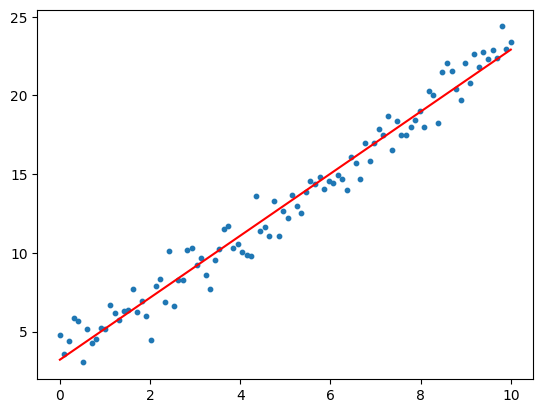

In [7]:
#写一个一元线性回归
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 生成随机数据
np.random.seed(0) # 设置随机种子 #设置随机种子后，每次生成的随机数都是一样的
n = 100 # 数据点个数
x = np.linspace(0, 10, n) # x坐标 #在指定的间隔内返回均匀间隔的数字
y = 2 * x + 3 + np.random.normal(0, 1, size=n) # y坐标
# 使用sklearn的LinearRegression模型进行拟合
model = LinearRegression()  #用的是最小二乘法，即最小化误差的平方和（SSE）用的是数学求导法（矩阵微分法）
model.fit(x.reshape(-1, 1), y.reshape(-1, 1)) #model.fit(x, y) #训练 #x.reshape(-1, 1)表示将x转换为一列 相当于转换成矩阵形式
a = model.coef_[0][0] # 拟合得到的参数a  #coef_是系数，intercept_是截距
b = model.intercept_[0]# 拟合得到的参数b  
print(f"拟合得到的直线为：y = {a:.4f}x + {b:.4f}")
#计算loss
y_pred = a * x + b
loss = np.mean((y_pred - y)**2)
print("loss:", loss)
# 绘制数据点
plt.scatter(x, y, s=10)#s表示点的大小
# 绘制拟合的直线
plt.plot(x, a*x + b, c='r')
plt.show()



In [3]:
#根据一元线性回归的公式求解
import numpy as np
import matplotlib.pyplot as plt
# 生成随机数据
np.random.seed(0) # 设置随机种子  #设置随机种子后，每次生成的随机数都是一样的
n = 100 # 数据点个数
x = np.linspace(-5, 5, n) # x坐标 #
y = 2 * x + 1 + np.random.normal(0, 1, size=n) # y坐标
# 使用最小二乘法求解参数向量
p, res, rnk, s = np.linalg.lstsq(x.reshape(-1, 1), y.reshape(-1, 1), rcond=None)
print(p)
a = p[0][0] # 拟合得到的参数a
b = p[1][0] # 拟合得到的参数b
print(f"拟合得到的直线为：y = {a:.2f}x + {b:.2f}")
# 绘制数据点
plt.scatter(x, y, s=10)
# 绘制拟合的直线
plt.plot(x, a*x + b, c='r')
plt.show()


[[1.97026731]]


IndexError: index 1 is out of bounds for axis 0 with size 1

Epoch 1: w=3.2893, b=0.5231, loss=205.4388
Epoch 2: w=2.0663, b=0.3674, loss=30.7180
Epoch 3: w=2.5132, b=0.4626, loss=6.7559
Epoch 4: w=2.3422, b=0.4646, loss=3.4415
Epoch 5: w=2.4000, b=0.5007, loss=2.9555
Epoch 6: w=2.3731, b=0.5237, loss=2.8575
Epoch 7: w=2.3777, b=0.5513, loss=2.8133
Epoch 8: w=2.3706, b=0.5768, loss=2.7771
Epoch 9: w=2.3679, b=0.6027, loss=2.7425
Epoch 10: w=2.3636, b=0.6282, loss=2.7088
Epoch 11: w=2.3600, b=0.6534, loss=2.6757
Epoch 12: w=2.3562, b=0.6784, loss=2.6433
Epoch 13: w=2.3525, b=0.7031, loss=2.6115
Epoch 14: w=2.3488, b=0.7276, loss=2.5804
Epoch 15: w=2.3452, b=0.7519, loss=2.5499
Epoch 16: w=2.3415, b=0.7759, loss=2.5200
Epoch 17: w=2.3380, b=0.7997, loss=2.4906
Epoch 18: w=2.3344, b=0.8232, loss=2.4619
Epoch 19: w=2.3309, b=0.8465, loss=2.4337
Epoch 20: w=2.3275, b=0.8696, loss=2.4061
Epoch 21: w=2.3240, b=0.8924, loss=2.3790
Epoch 22: w=2.3206, b=0.9150, loss=2.3525
Epoch 23: w=2.3173, b=0.9374, loss=2.3265
Epoch 24: w=2.3139, b=0.9596, loss=2.301

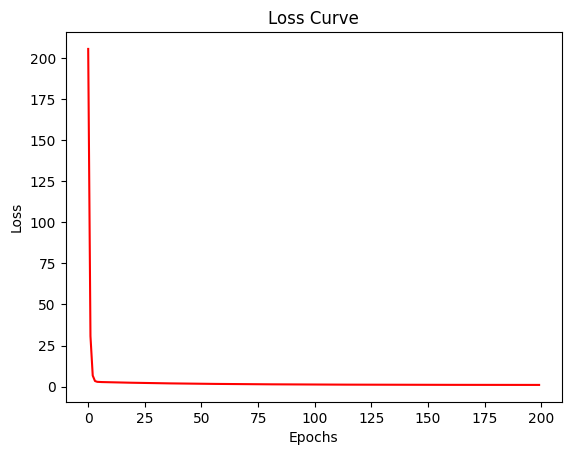

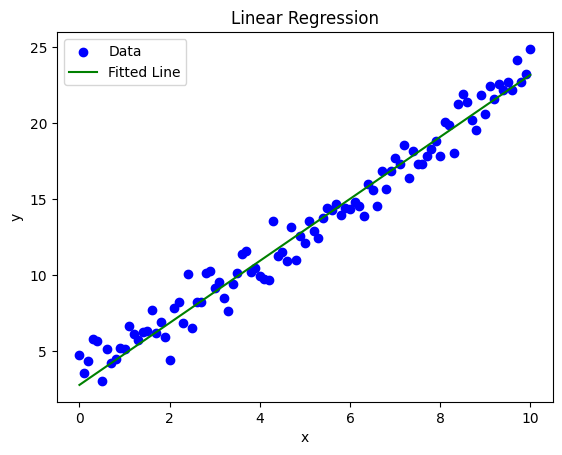

In [15]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据，假设真实的w为2，b为3
np.random.seed(0) # 设置随机种子
x = np.linspace(0, 10, 100) # 生成100个在[0,10]的等距数 (包括0，10)
y = 2 * x + 3 + np.random.normal(0, 1, 100) # 生成y值，加入噪声

# 定义一元线性回归模型
def linear_regression(x, w, b):
    return w * x + b

# 定义均方误差函数
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 定义梯度下降算法
def gradient_descent(x, y, w, b, lr, epochs):
    # x: 自变量
    # y: 目标变量
    # w: 斜率的初始值
    # b: 截距的初始值
    # lr: 学习率
    # epochs: 迭代次数
    n = len(x) # 样本数量
    history_w = [] # 用来记录w的历史值
    history_b = [] # 用来记录b的历史值
    history_loss = [] # 用来记录损失函数的历史值

    for i in range(epochs): # 迭代epochs次
        # 计算预测值
        y_pred = linear_regression(x, w, b)
        # 计算损失值
        loss = mean_squared_error(y, y_pred)
        # 计算梯度
        dw = -2/n * np.sum((y - y_pred) * x)
        db = -2/n * np.sum(y - y_pred)
        # 更新w和b
        w = w - lr * dw
        b = b - lr * db
        # 记录w，b和损失值
        history_w.append(w)
        history_b.append(b)
        history_loss.append(loss)
        # 打印结果
        print(f"Epoch {i+1}: w={w:.4f}, b={b:.4f}, loss={loss:.4f}")

    return history_w, history_b, history_loss

# 设置超参数
w = 0 # 斜率的初始值
b = 0 # 截距的初始值
lr = 0.02 # 学习率
epochs = 200 # 迭代次数

# 调用梯度下降算法
history_w, history_b, history_loss = gradient_descent(x, y, w, b, lr, epochs)

# 绘制损失函数的变化曲线
plt.plot(range(epochs), history_loss, color="r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# 绘制最终的拟合直线
plt.scatter(x, y, color="b", label="Data")
plt.plot(x, linear_regression(x, history_w[-1], history_b[-1]), color="g", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


In [10]:
import numpy as np
np.random.seed(0)  # 设置随机种子
print(np.random.rand(3,2)) #生成3行2列的[0,1) 均匀分布的随机数 均匀分布:每个数出现的概率相同
print(np.random.randn(3,2))#生成3行2列的标准正态分布的随机数 (均值为0，标准差为1) 正态分布:大部分数值都集中在均值附近
print(np.random.randint(1,10,(3,2))) #生成3行2列的[1,10) 均匀分布的随机整数
'''
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]]
[[ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]]
[[9 2]
 [6 9]
 [5 4]]
'''


[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]]
[[-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]]
[[3 5]
 [8 8]
 [2 8]]


'\n[[0.5488135  0.71518937]\n [0.60276338 0.54488318]\n [0.4236548  0.64589411]]\n[[ 0.95008842 -0.15135721]\n [-0.10321885  0.4105985 ]\n [ 0.14404357  1.45427351]]\n[[9 2]\n [6 9]\n [5 4]]\n'

In [19]:
import numpy as np
print(np.linspace(0, 10, 101))  #在指定的间隔内返回均匀间隔的数字
"""
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
"""

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


'\n\n'

In [20]:
import numpy as np
np.random.seed(0) # 设置随机种子
a = np.random.normal(0, 0.1, (3, 2)) # 生成随机数组
print(a)
'''
[[ 0.17640523  0.04001572]
 [ 0.0978738   0.22408932]
 [ 0.1867558  -0.09772779]]
'''

[[ 0.17640523  0.04001572]
 [ 0.0978738   0.22408932]
 [ 0.1867558  -0.09772779]]


w=1.9703, b=3.2085, loss=1.0083


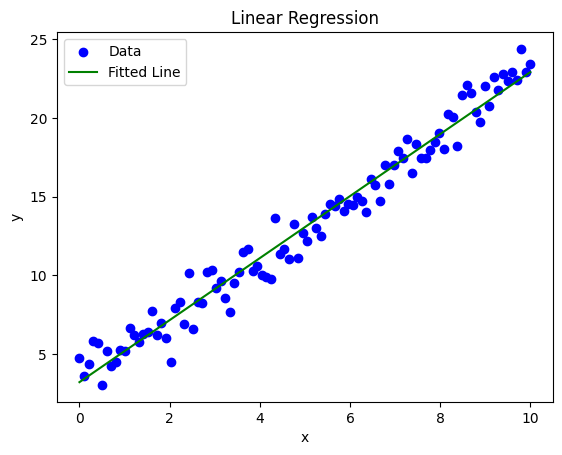

In [22]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据，假设真实的w为2，b为3
np.random.seed(0) # 设置随机种子
x = np.linspace(0, 10, 100) # 生成100个在[0,10]之间的等距数
y = 2 * x + 3 + np.random.normal(0, 1, 100) # 生成y值，加入噪声

# 定义一元线性回归模型
def linear_regression(x, w, b):
    return w * x + b

# 定义MSE损失函数
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 定义基于求导的数学方法
def analytical_solution(x, y):
    # x: 自变量
    # y: 目标变量
    n = len(x) # 样本数量
    # 计算w和b的闭式解
    w = (n * np.sum(y * x) - np.sum(y) * np.sum(x)) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
    b = (np.sum(y) - w * np.sum(x)) / n
    # 返回w和b
    return w, b

# 调用基于求导的数学方法
w, b = analytical_solution(x, y)

# 计算预测值
y_pred = linear_regression(x, w, b)

# 计算损失值
loss = mean_squared_error(y, y_pred)

# 打印结果
print(f"w={w:.4f}, b={b:.4f}, loss={loss:.4f}")

# 绘制拟合直线
plt.scatter(x, y, color="b", label="Data")
plt.plot(x, y_pred, color="g", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


In [23]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据，假设真实的w为2，b为3
np.random.seed(0) # 设置随机种子
x = np.linspace(0, 10, 100) # 生成100个在[0,10]之间的等距数
y = 2 * x + 3 + np.random.normal(0, 1, 100) # 生成y值，加入噪声

# 将x和y转换为矩阵形式
X = np.vstack([x, np.ones(len(x))]).T # 将x和全1列向量合并为n×2的矩阵
Y = y.reshape(-1, 1) # 将y转换为n×1的列向量

# 定义矩阵微分的方法
def matrix_solution(X, Y):
    # X: 自变量矩阵
    # Y: 目标变量矩阵
    n = len(X) # 样本数量
    # 计算一些常用的矩阵
    XTX = X.T.dot(X) # X的转置乘以X
    XTY = X.T.dot(Y) # X的转置乘以Y
    XT1 = X.T.dot(np.ones((n, 1))) # X的转置乘以全1列向量
    T1Y = np.ones((n, 1)).T.dot(Y) # 全1列向量的转置乘以Y
    T11 = np.ones((n, 1)).T.dot(np.ones((n, 1))) # 全1列向量的转置乘以全1列向量
    # 计算w和b的闭式解
    b = (XTY - XTX.dot(XT1)) / (XT1 - XTX.dot(T11))
    w = (T1Y - XT1.dot(b)) / T11
    # 返回w和b
    return w, b

# 调用矩阵微分的方法
w, b = matrix_solution(X, Y)

# 计算预测值
y_pred = X.dot(np.array([w, b]))

# 计算损失值
loss = np.mean((Y - y_pred) ** 2)

# 打印结果
print(f"w={w:.4f}, b={b:.4f}, loss={loss:.4f}")

# 绘制拟合直线
plt.scatter(x, y, color="b", label="Data")
plt.plot(x, y_pred, color="g", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


ValueError: shapes (2,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

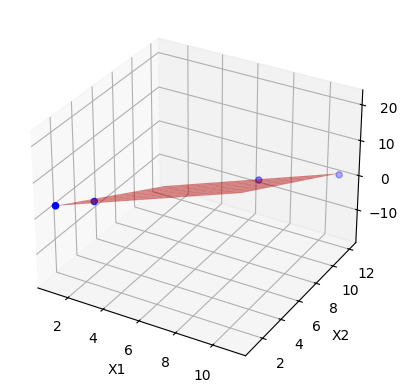

In [8]:
# 导入库
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
y = A[:, 0] # 因变量
X = A[:, 1:] # 自变量

# 建立模型
model = LinearRegression()
model.fit(X, y)

# 绘制散点图
fig = plt.figure() # 创建画布
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# 绘制拟合线
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
y_pred = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.5)

# 设置坐标轴标签
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# 显示图形
plt.show()


拟合参数: a = 1.83, b = -1.81, c = 2.98
拟合方程: y = 1.83x1 + -1.81x2 + 2.98


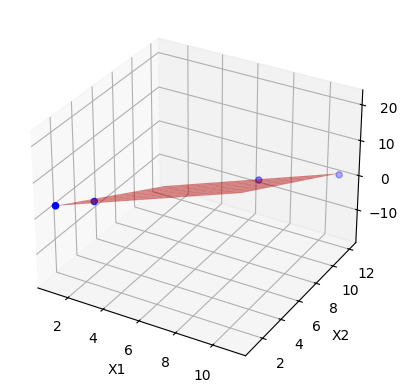

In [1]:
# 导入库
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
y = A[:, 0] # 因变量
X = A[:, 1:] # 自变量

# 定义拟合函数，即要最小化的误差函数
def residual(params, X, y):
    a, b, c = params # 拟合参数
    return y - (a * X[:, 0] + b * X[:, 1] + c) # 残差

# 初始参数值
params0 = [1, 1, 1]

# 最小二乘法求解
result = leastsq(residual, params0, args=(X, y))
a, b, c = result[0] # 拟合结果

# 输出结果
print(f"拟合参数: a = {a:.2f}, b = {b:.2f}, c = {c:.2f}")
print(f"拟合方程: y = {a:.2f}x1 + {b:.2f}x2 + {c:.2f}")

# 绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# 绘制拟合平面
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
y_pred = a * x1 + b * x2 + c
ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.5)

# 设置坐标轴标签
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# 显示图形
plt.show()


In [1]:
# 导入库
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12]])
y = A[:, 0] # 因变量 #A[:,0]表示取所有行的第0列 [[1,3,2,1]]
X = A[:, 1:] # 自变量 #A[:,1:]表示取所有行的第1列及其后面的列 [[2,3],[1,1],[8,9],[11,12]]

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10) # 生成x1坐标 #np.linspace()函数用于创建等差数列 #X[:,0].min()表示取所有行的第0列的最小值 #X[:,0].max()表示取所有行的第0列的最大值 #10表示生成10个数
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10) 
print(x1)
print(x2)
x1, x2 = np.meshgrid(x1, x2) # 生成网格点坐标矩阵 #np.meshgrid()函数用于生成网格点坐标矩阵 #x1表示x轴坐标矩阵 #x2表示y轴坐标矩阵
print(x1)
print(x2)
print(np.c_[x1.ravel(), x2.ravel()])
print(x1)



[ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
  7.66666667  8.77777778  9.88888889 11.        ]
[ 1.          2.22222222  3.44444444  4.66666667  5.88888889  7.11111111
  8.33333333  9.55555556 10.77777778 12.        ]
[[ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]
 [ 1

In [19]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义二次曲面的函数模型
def func(x, y, a, b, c, d, e, f):
    return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y + f

# 数据 A
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12],[3,4,5],[7,8,9]])

# 分解数据为 x, y, z
x = A[:, 0]
y = A[:, 1]
z = A[:, 2]

# 初始参数
p0 = [1, 1, 1, 1, 1, 1]

# 拟合
popt, pcov = curve_fit(func, x, y, z, p0) #

# 输出结果
print("拟合参数:", popt)

# 绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')

# 绘制拟合曲面
x = np.linspace(x.min(), x.max(), 10)
y = np.linspace(y.min(), y.max(), 10)
x, y = np.meshgrid(x, y)
z = func(x,y,*popt ) #
ax.plot_surface(x,y,z, color='r', alpha=0.5)

# 设置坐标轴标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 显示图形
plt.show()

TypeError: func() missing 1 required positional argument: 'f'

回归参数: [2.00000006 2.         2.96579666]


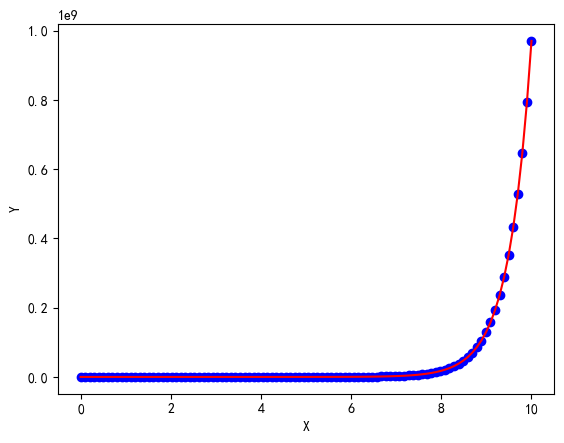

In [70]:
# 导入库
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(0) # 设置随机种子
n = 100 # 数据点个数
x = np.linspace(0, 10, n) # x坐标
y = 2 * np.exp(2 * x)+ 3 + np.random.normal(0, 1, size=n) # y坐标

# 定义非线性函数，这里假设是一个指数函数
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# 拟合模型，得到回归参数和参数协方差
popt, pcov = curve_fit(func, x, y,p0=[1,1,1],method='lm') # 不加p0=[1,1,1]和method='lm'也可以，默认表示初始参数为1,1,1,method='lm'
#method='lm'表示使用Levenberg-Marquardt算法 #只有这三种
#还有其他的算法 比如method='trf'表示使用Trust Region Reflective算法、method='dogbox'表示使用dogleg算法

# 打印回归参数
print('回归参数:', popt)

# 绘制散点图
plt.scatter(x, y, c='b', marker='o')

# 绘制拟合曲线

y_pred = func(x, *popt) #*popt表示将popt拆分为3个参数 即[1,2，3]拆分为1,2,3
plt.plot(x, y_pred, c='r')

# 设置坐标轴标签
plt.xlabel('X')
plt.ylabel('Y')

# 显示图形
plt.show()


拟合参数: [2.00000004 2.         2.99447945]
拟合方程: y = 2.0000e^2.0000x + 2.9945
退出原因 2


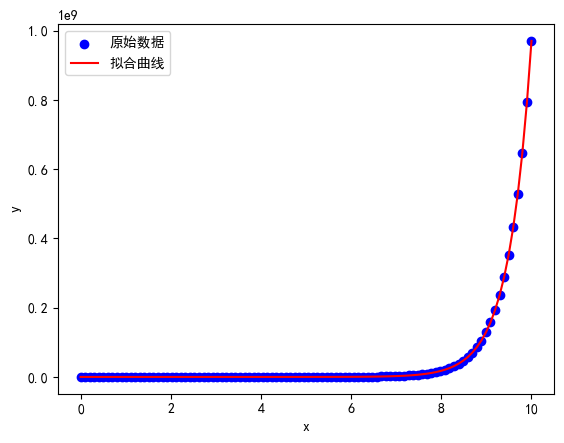

In [73]:
# 导入库
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]


# 生成随机数据
np.random.seed(0) # 设置随机种子
n = 100 # 数据点个数
x = np.linspace(0, 10, n) # x坐标
y = 2 * np.exp(2 * x) + 3 + np.random.normal(0, 1, size=n) # y坐标


# 定义拟合函数，即要最小化的误差函数
def residual(params, x, y):
    a, b, c = params # 拟合参数
    return  y - (a * np.exp(b * x)+ c) # 残差 真实值-预测值  ##！！！

# 初始参数值
params0 = [1, 1, 1]
          
# 最小二乘法求解
result = leastsq(residual, params0, args=(x, y))#rgs=(x, y)为传入residual函数的参数
a, b, c = result[0] # 拟合结果

# 输出结果
print("拟合参数:", result[0])
print(f"拟合方程: y = {a:.4f}e^{b:.4f}x + {c:.4f}")
print("退出原因",result[1])

# 绘制散点图
plt.scatter(x, y, c='b', marker='o', label='原始数据') #marker表示点的形状 'o'表示圆形

# 绘制拟合曲线
plt.plot(x, a * np.exp(b * x)+ c, c='r', label='拟合曲线')

# 设置坐标轴标签和图例
plt.xlabel('x')
plt.ylabel('y')
plt.legend() #显示图例 左上角的

# 显示图形
plt.show()

真实参数: 1 5 2
leastsq方法拟合参数 [0.98878408 4.99079501 2.02431117]


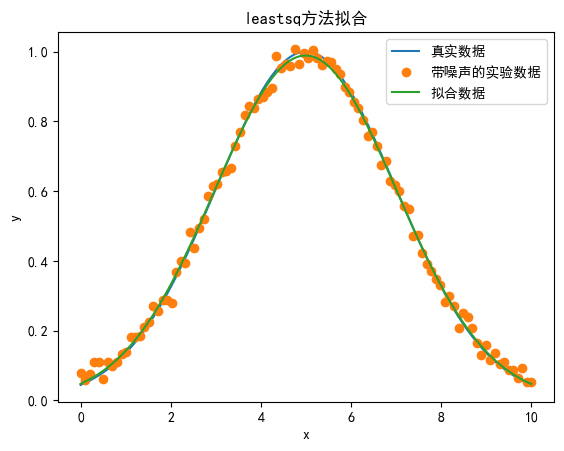

curve_fit方法拟合参数 [0.98878408 4.99079501 2.02431117]


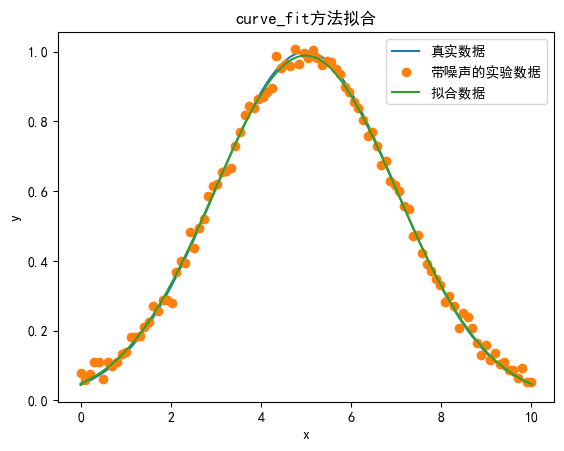

In [41]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.optimize import leastsq          #导入leastsq模块
from scipy.optimize import curve_fit        #导入leastsq模块
import matplotlib.pyplot as plt             #导入pyplot模块
#####  引用以下3句 在绘图显示中文时不会出现乱码  ####
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def func(x, p):
    ## 定义拟合函数 y=a*np.exp(-(x-b)**2/(2*c**2))
    a, b, c = p
    return a*np.exp(-(x-b)**2/(2*c**2))
def residuals(p, y, x):
    #实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    return y - func(x, p)
x = np.linspace(0, 10, 100)
a, b, c = 1, 5, 2                           # 真实数据的函数参数
y0 = func(x, [a, b, c])                     # 真实数据
np.random.seed(0)                           # 随机噪声种子
y1 = y0 + 0.02 * np.random.randn(len(x))    # 加入噪声之后的实验数据
P0 = [2, 0.40, 0.2]                         # 第一次猜测的函数拟合参数
result_fit1 = leastsq(residuals,P0,args=(y1,x))#拟合函数
print ("真实参数:", a, b, c)
print ("leastsq方法拟合参数", result_fit1[0]) # leastsq方法拟合参数拟合后的参数
plt.plot(x, y0, label="真实数据")            #绘制真实数据
plt.plot(x, y1,"o", label="带噪声的实验数据") #绘制带有噪声数据
plt.plot(x, func(x, result_fit1[0]), label="拟合数据") #绘制拟合结果
plt.title('leastsq方法拟合')                 #添加标题
plt.xlabel('x')                             #x轴名称
plt.ylabel('y')                             #y轴名称
plt.legend()                                #添加图例
plt.show()                                  #显示图像

def func2(x, a, b, c):                      #定义需要拟合的函数
    return a*np.exp(-(x-b)**2/(2*c**2))
popt, _ = curve_fit(func2, x, y1, p0=P0)    #拟合函数
print ("curve_fit方法拟合参数",popt) # curve_fit方法拟合参数拟合后的参数
plt.plot(x, y0, label="真实数据")           #绘制真实数据
plt.plot(x, y1,"o", label="带噪声的实验数据") #绘制带有噪声数据
plt.plot(x, func2(x, popt[0],popt[1],popt[2]), label="拟合数据") #绘制拟合结果
plt.title('curve_fit方法拟合')               #添加标题
plt.xlabel('x')                             #x轴名称
plt.ylabel('y')                             #y轴名称
plt.legend()                                #添加图例
plt.show()                                  #显示图像


拟合参数: k = 1.9703, b = 3.2085
拟合方程: y = 1.9703x + 3.2085
退出原因 3


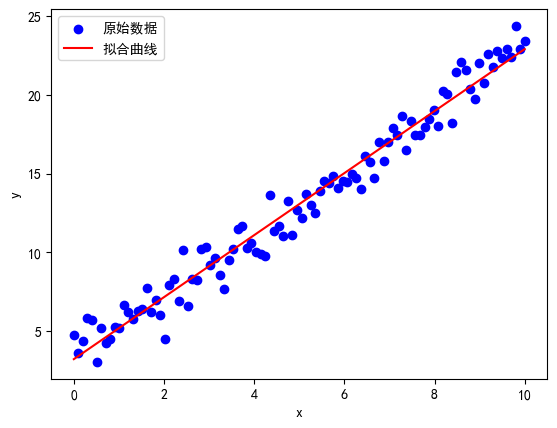

In [72]:
# 导入库
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 生成随机数据
np.random.seed(0) # 设置随机种子
n = 100 # 数据点个数
x = np.linspace(0, 10, n) # x坐标
y = 2 * x + 3 + np.random.normal(0, 1, size=n) # y坐标


# 定义拟合函数，即要最小化的误差函数
def residual(params, x, y):
    k, b = params # 拟合参数
    return y - (k * x + b) # 残差

# 初始参数值
params0 = [1, 1]

# 最小二乘法求解
result = leastsq(residual, params0, args=(x, y))
k, b = result[0] # 拟合结果

# 输出结果
print(f"拟合参数: k = {k:.4f}, b = {b:.4f}")
print(f"拟合方程: y = {k:.4f}x + {b:.4f}")
print("退出原因",result[1])

# 绘制散点图
plt.scatter(x, y, c='b', marker='o', label='原始数据') #marker表示点的形状 'o'表示圆形

# 绘制拟合曲线
plt.plot(x, k*x+b, c='r', label='拟合曲线')

# 设置坐标轴标签和图例
plt.xlabel('x')
plt.ylabel('y')
plt.legend() #显示图例 左上角的

# 显示图形
plt.show()


拟合参数: [ 0.25       -0.08333333 -0.16666667 -0.91666667  2.25       -0.16666667]
退出原因: 2


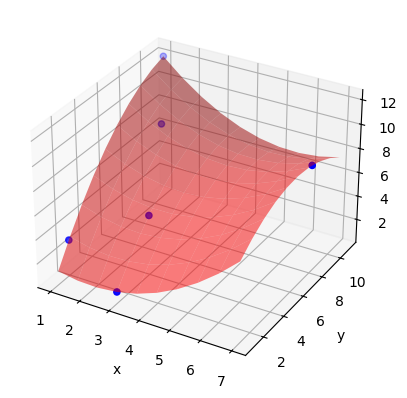

In [4]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义二次曲面的函数模型
def func(p, x, y):
    a, b, c, d, e, f = p
    return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y + f

# 定义误差函数
def error(p, x, y, z):
    return z - func(p, x, y) 

# 数据点
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12],[3,4,5],[7,8,9]])
x = A[:, 0]
y = A[:, 1]
z = A[:, 2]

# 初始参数
p0 = [1, 1, 1, 1, 1, 1]

# 拟合
plsq = leastsq(error, p0, args=(x,y,z))

# 输出结果
print("拟合参数:", plsq[0])
print("退出原因:", plsq[1]) 

# 绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')

# 绘制拟合曲面
x = np.linspace(x.min(), x.max(), 10)
y = np.linspace(y.min(), y.max(), 10)
x, y = np.meshgrid(x, y)
z = func(plsq[0],x,y ) 
ax.plot_surface(x,y,z, color='r', alpha=0.5)

# 设置坐标轴标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 显示图形
plt.show()

d:\softwares\anaconda3\envs\myopen3d\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


回归参数: [ 0.25       -0.08333333 -0.16666667 -0.91666667  2.25       -0.16666667]


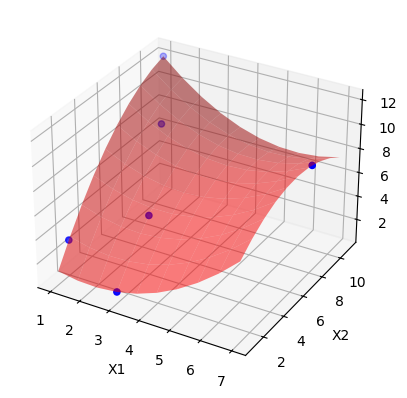

In [5]:
# 导入库
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
A = np.array([[1, 2, 3], [3, 1, 1], [2, 8, 9], [1, 11, 12],[3,4,5],[7,8,9]])
y = A[:, 2] # 因变量
X = A[:, [0,1]] # 自变量

# 定义非线性函数，这里假设是一个二次曲面
def func(x, a, b, c, d, e, f):
    return a * x[0]**2 + b * x[1]**2 + c * x[0] * x[1] + d * x[0] + e * x[1] + f

# 拟合模型，得到回归参数和参数协方差
popt, pcov = curve_fit(func, X.T, y)


# 打印回归参数
print('回归参数:', popt)

# 绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# 绘制拟合曲面
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
y_pred = func([x1, x2], *popt)
ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.5)

# 设置坐标轴标签
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# 显示图形
plt.show()


In [4]:
import numpy as np
# 生成随机数据
np.random.seed(0) # 设置随机种子
n = 100 # 数据点个数
x = np.linspace(0, 10, n) # x坐标
y = 2 * x + 3 + np.random.normal(0, 1, size=n) # y坐标
z = 2 * y + 3 + np.random.normal(0, 1, size=n) # y坐标

A = np.vstack([x,y,z]).T #按垂直方向（行顺序）堆叠数组构成一个新的数组 成3x100的矩阵 然后转置成100x3的矩阵
A

array([[ 0.        ,  4.76405235, 14.41125539],
       [ 0.1010101 ,  3.60217741,  8.85659576],
       [ 0.2020202 ,  4.38277839, 10.49507178],
       [ 0.3030303 ,  5.84695381, 15.66330432],
       [ 0.4040404 ,  5.6756388 , 13.17815419],
       [ 0.50505051,  3.03282313, 11.00926745],
       [ 0.60606061,  5.16220963, 12.91080028],
       [ 0.70707071,  4.26278421, 10.7781136 ],
       [ 0.80808081,  4.51294276, 13.94882756],
       [ 0.90909091,  5.22878032, 14.93807543],
       [ 1.01010101,  5.16424559, 15.19605014],
       [ 1.11111111,  6.67649573, 17.25903612],
       [ 1.21212121,  6.18528015, 14.50933461],
       [ 1.31313131,  5.74793764, 16.40594024],
       [ 1.41414141,  6.27214606, 15.27628875],
       [ 1.51515152,  6.36397736, 16.53041111],
       [ 1.61616162,  7.72640231, 19.40005658],
       [ 1.71717172,  6.22918517, 15.30336025],
       [ 1.81818182,  6.94943134, 17.51294205],
       [ 1.91919192,  5.9842881 , 15.89078287],
       [ 2.02020202,  4.48741422, 12.351

In [15]:
# 导入numpy库
import numpy as np

# 定义曲面函数z = f(x, y)
def f(x, y):
    return 0.25*x**2 -0.083*y**2 -0.16* x*y -0.92*x + 2.25*y -0.167  

# 定义曲面的梯度函数，即一阶偏导数
def gradient(f, x, y):
    # 使用中心差分法近似求导  #参考https://cloud.tencent.com/developer/article/1685164
    h = 1e-6 # 差分步长，可以根据精度要求调整
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h) # 对x求偏导
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h) # 对y求偏导
    return df_dx, df_dy

# 定义曲面的曲率函数，即二阶偏导数
def curvature(f, x, y):
    # 使用中心差分法近似求导
    h = 1e-6 # 差分步长，可以根据精度要求调整
    d2f_dx2 = (f(x + h, y) - 2 * f(x, y) + f(x - h, y)) / (h ** 2) # 对x求二阶偏导
    d2f_dy2 = (f(x, y + h) - 2 * f(x, y) + f(x, y - h)) / (h ** 2) # 对y求二阶偏导
    d2f_dxdy = (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h ** 2) # 对xy求混合偏导
    # 根据公式计算高斯曲率K和平均曲率H
    df_dx, df_dy = gradient(f, x, y) # 调用梯度函数求一阶偏导
    E = 1 + df_dx ** 2
    F = df_dx * df_dy
    G = 1 + df_dy ** 2
    L = d2f_dx2 / np.sqrt(1 + df_dx ** 2 + df_dy ** 2) #np.sqrt()表示开方
    M = d2f_dxdy / np.sqrt(1 + df_dx ** 2 + df_dy ** 2)
    N = d2f_dy2 / np.sqrt(1 + df_dx ** 2 + df_dy ** 2)
    K = (L * N - M ** 2) / (E * G - F ** 2) # 高斯曲率
    H = (E * N + G * L - 2 * F * M) / (2 * (E * G - F ** 2)) # 平均曲率
    return K, H

# 测试曲率函数
x = 1 # 某一点的x坐标
y = 2 # 某一点的y坐标
K, H = curvature(f, x, y) # 计算该点的曲率
print(f"高斯曲率为：{K:.6f}")
print(f"平均曲率为：{H:.6f}")

高斯曲率为：-0.005040
平均曲率为：0.068719


20
20
E*G - F**2: [0.00150441 0.00132313 0.00110262 0.00096054 0.00087407 0.00082371
 0.00079315 0.00076939 0.00074265 0.00070642 0.00065745 0.00059573
 0.00052452 0.00045034 0.00038295 0.00033537 0.00032388 0.00036802
 0.00049058 0.00057391 0.00147613 0.00129027 0.00105873 0.00090734
 0.00081329 0.00075705 0.00072234 0.00069614 0.00066869 0.00063346
 0.00058721 0.00052993 0.00046488 0.00039857 0.00034077 0.00030451
 0.00030605 0.00036494 0.00050397 0.00059733 0.00138527 0.00119755
 0.00095771 0.00079972 0.00070081 0.00064142 0.00060528 0.00057937
 0.00055392 0.00052241 0.0004816  0.00043148 0.00037531 0.0003196
 0.00027412 0.00025188 0.00026918 0.00034554 0.00050376 0.00060986
 0.00130801 0.00111843 0.00087029 0.00070572 0.00060193 0.00053939
 0.00050182 0.00047619 0.00045275 0.00042497 0.0003896  0.00034664
 0.00029934 0.00025423 0.00022106 0.00021286 0.00024591 0.00033974
 0.00051715 0.00063599 0.00124436 0.00105292 0.00079647 0.00062531
 0.00051665 0.00045096 0.00041196 0.00038662 

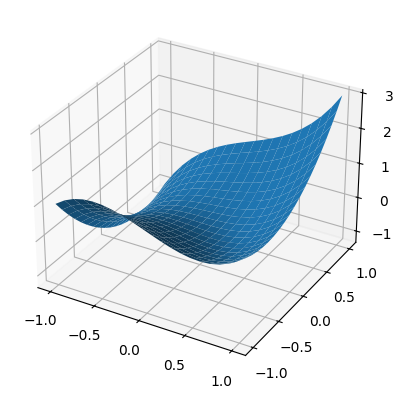

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def surface_curvature(X, Y, Z):

	(lr, lb) = X.shape

	print(lr)
	print(lb)
# 一阶导数
	Xv, Xu = np.gradient(X) #np.gradient(X)返回的是一个包含两个元素的元组，第一个元素是X沿着轴0的梯度，第二个元素是X沿着轴1的梯度
	#print(Xv)#按行差分
	#print(Xu)#按列
	Yv, Yu = np.gradient(Y)
	Zv, Zu = np.gradient(Z)


# 二阶导数
	Xuv, Xuu = np.gradient(Xu)
	Yuv, Yuu = np.gradient(Yu)
	Zuv, Zuu = np.gradient(Zu)

	Xvv, Xuv = np.gradient(Xv)
	Yvv, Yuv = np.gradient(Yv)
	Zvv, Zuv = np.gradient(Zv)

# 2D 到 1D 转换
# 重构为一维向量
	Xu = np.reshape(Xu, lr*lb) #np.reshape()函数用于重构数组，将数组重构为指定形状
	Yu = np.reshape(Yu, lr*lb)
	Zu = np.reshape(Zu, lr*lb)
	Xv = np.reshape(Xv, lr*lb)
	Yv = np.reshape(Yv, lr*lb)
	Zv = np.reshape(Zv, lr*lb)
	Xuu = np.reshape(Xuu, lr*lb)
	Yuu = np.reshape(Yuu, lr*lb)
	Zuu = np.reshape(Zuu, lr*lb)
	Xuv = np.reshape(Xuv, lr*lb)
	Yuv = np.reshape(Yuv, lr*lb)
	Zuv = np.reshape(Zuv, lr*lb)
	Xvv = np.reshape(Xvv, lr*lb)
	Yvv = np.reshape(Yvv, lr*lb)
	Zvv = np.reshape(Zvv, lr*lb)

	Xu = np.c_[Xu, Yu, Zu] #np.c_[]函数用于按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
	Xv = np.c_[Xv, Yv, Zv]
	Xuu = np.c_[Xuu, Yuu, Zuu]
	Xuv = np.c_[Xuv, Yuv, Zuv]
	Xvv = np.c_[Xvv, Yvv, Zvv]

# 曲面的第一基本系数(E,F,G)
	
	E = np.einsum('ij,ij->i', Xu, Xu) #
	F = np.einsum('ij,ij->i', Xu, Xv)
	G = np.einsum('ij,ij->i', Xv, Xv)
	print("E*G - F**2:",E*G - F**2)
	m = np.cross(Xu, Xv, axisa=1, axisb=1)
	p = np.sqrt(np.einsum('ij,ij->i', m, m))
	n = m/np.c_[p, p, p]
# n 为法向量
# 曲面的第二基本系数(L,M,N)， (e,f,g)
	L = np.einsum('ij,ij->i', Xuu, n)  # e
	M = np.einsum('ij,ij->i', Xuv, n)  # f
	N = np.einsum('ij,ij->i', Xvv, n)  # g

# 高斯曲率
	K = (L*N-M**2)/(E*G-F**2)
	K = np.reshape(K, lr*lb)
# print(K.size)

# 平均曲率
	H = ((E*N + G*L - 2*F*M)/((E*G - F**2)))/2
	print(H.shape)
	H = np.reshape(H,lr*lb)
# print(H.size)

# 主曲率
	Pmax = H + np.sqrt(H**2 - K)
	Pmin = H - np.sqrt(H**2 - K)
# [Pmax, Pmin]最大主曲率和最小主曲率
	Principle = [Pmax, Pmin]
	return Principle


x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
[x, y] = np.meshgrid(x, y)

z = (x**3 +y**2 +x*y)

temp1 = surface_curvature(x, y, z)
#print("maximum curvatures")
#print(temp1[0])
#print("minimum curvatures")
#print(temp1[1])

print("x",x)
print("y",y)
print("z",z)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z)
plt.show()


In [2]:
# 导入 sympy 库，用于符号计算
import sympy as sp

# 定义符号变量 x, y, z
x, y, z = sp.symbols('x y z')

# 定义隐函数 f
f = 0.25*x**2 -0.083*y**2 -0.16* x*y -0.92*x + 2.25*y -0.167 - z

# 计算 f 的偏导数和二阶偏导数
fx = sp.diff(f, x)
fy = sp.diff(f, y)
fz = sp.diff(f, z)
fxx = sp.diff(fx, x)
fxy = sp.diff(fx, y)
fxz = sp.diff(fx, z)
fyy = sp.diff(fy, y)
fyz = sp.diff(fy, z)

# 计算 L, M, N 的表达式
L = -(fxx*fz - fxz**2)/fz**3
M = -(fxy*fz - fxz*fyz)/fz**3
N = -(fyy*fz - fyz**2)/fz**3

# 打印 L, M, N 的结果
print("L =", L)
print("M =", M)
print("N =", N)


L = -0.500000000000000
M = 0.160000000000000
N = 0.166000000000000
